In [26]:
import numpy as np
import math
from pprint import pprint
import matplotlib.pyplot as plt 
from annfuncs import *

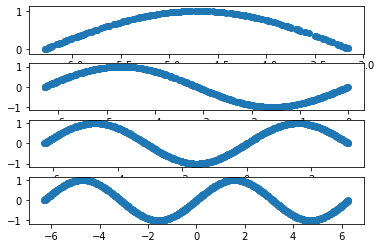

In [27]:
#creating sin data
import random
inputvals=[]
outputvals=[]

for i in range(0,4):
    for j in range(0,250):
        x=random.uniform(-2*math.pi + i*math.pi,-1*math.pi+i*math.pi)
        inputvals.append(x)
        y=math.sin(x)
        outputvals.append(y)
    plt.subplot(4,1,i+1)
    plt.scatter(inputvals,outputvals) 



In [28]:
# test values
test=[]
for j in range(0,300):
        test.append(random.uniform(-2*math.pi,2*math.pi))
        

In [29]:
# only for sigmoid

def normalise(outputvals):
    mins=min(outputvals)
    maxes=max(outputvals)
    outs=[]
    for i in range(1000):
    #     inputvals[i]=(inputvals[i]-mins)/maxes-mins
        outs.append((outputvals[i]-(-1))/2)
    return outs

In [30]:
# layers_dims = [1,275,175,50,1] #  4-layer 
# layers_dims = [1,80,40,20,1] #  4-layer model

train_x=np.array(inputvals).reshape(1,1000)
train_y=np.array(outputvals).reshape(1,1000)

In [ ]:
layers_dims = [1,20,20,1] #  3-layer model


parameters = L_layer_model_minib(train_x, train_y, layers_dims, valid=False, num_iterations = 500,learning_rate = 0.001, 
                            print_cost = True,lambd=0.1,optimizer="momentum", beta = 0.9,beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,
                            activation='sigmoid',regularisation='none',mini_batch_size=1,cost_func="mse",he_init=True)

In [ ]:
pred_train = predictvals(train_x, parameters,activation='sigmoid')
# print(pred_train)
for i in range(1000):
    pred_train[0][i]=pred_train[0][i]*(maxes-mins)+mins

In [ ]:
# pred_train = predictvals(train_x, parameters,activation='tanh')
plt.scatter(train_x[0],pred_train[0])
plt.show()
plt.scatter(train_x[0],train_y[0])
plt.show()

test_x=np.array(test).reshape(1,300)
pred_test = predictvals(test_x, parameters,activation='tanh')

plt.scatter(train_x[0],train_y[0],color='blue')
plt.scatter(test_x[0],pred_test[0],color='red')
plt.legend(['train','test'])
plt.show()

mape=predicterr(train_x,train_y,parameters,lambd=0.1,activation='tanh',regularisation='none',cost_func="mape")
print(mape)

Cost after epoch 0: 0.097555
Cost after epoch 3: 0.051573
Cost after epoch 6: 0.046674
Cost after epoch 9: 0.041627
Cost after epoch 12: 0.037301
Cost after epoch 15: 0.033123
Cost after epoch 18: 0.028292
Cost after epoch 21: 0.024648
Cost after epoch 24: 0.021282
Cost after epoch 27: 0.018416
Cost after epoch 30: 0.016241
Cost after epoch 33: 0.014838
Cost after epoch 36: 0.013521
Cost after epoch 39: 0.012528
Cost after epoch 42: 0.011680
Cost after epoch 45: 0.011110
Cost after epoch 48: 0.010645
Cost after epoch 51: 0.010487
Cost after epoch 54: 0.010115
Cost after epoch 57: 0.009802
Cost after epoch 60: 0.009697
Cost after epoch 63: 0.009624
Cost after epoch 66: 0.009319
Cost after epoch 69: 0.009355
Cost after epoch 72: 0.009136
Cost after epoch 75: 0.009152
Cost after epoch 78: 0.008987
Cost after epoch 81: 0.008901
Cost after epoch 84: 0.008973
Cost after epoch 87: 0.009010
Cost after epoch 90: 0.008896
Cost after epoch 93: 0.008797
Cost after epoch 96: 0.008832
Cost after epo

Cost after epoch 807: 0.000121
Cost after epoch 810: 0.000118
Cost after epoch 813: 0.000113
Cost after epoch 816: 0.000117
Cost after epoch 819: 0.000125
Cost after epoch 822: 0.000117
Cost after epoch 825: 0.000139
Cost after epoch 828: 0.000115
Cost after epoch 831: 0.000116
Cost after epoch 834: 0.000136
Cost after epoch 837: 0.000140
Cost after epoch 840: 0.000115
Cost after epoch 843: 0.000136
Cost after epoch 846: 0.000111
Cost after epoch 849: 0.000161
Cost after epoch 852: 0.000116
Cost after epoch 855: 0.000120
Cost after epoch 858: 0.000162
Cost after epoch 861: 0.000111
Cost after epoch 864: 0.000134
Cost after epoch 867: 0.000106
Cost after epoch 870: 0.000122
Cost after epoch 873: 0.000111
Cost after epoch 876: 0.000113
Cost after epoch 879: 0.000115
Cost after epoch 882: 0.000117
Cost after epoch 885: 0.000115
Cost after epoch 888: 0.000108
Cost after epoch 891: 0.000124
Cost after epoch 894: 0.000119
Cost after epoch 897: 0.000112
Cost after epoch 900: 0.000127
Cost aft

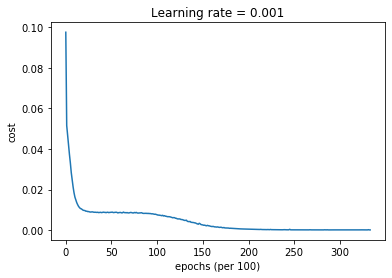

In [31]:
layers_dims = [1,20,20,1] #  3-layer model


parameters = L_layer_model_minib(train_x, train_y, layers_dims, valid=False, num_iterations = 1000,learning_rate = 0.001, 
                            print_cost = True,lambd=0.1,optimizer="adam", beta = 0.9,beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,
                            activation='sigmoid',regularisation='none',mini_batch_size=64,cost_func="mse",he_init=True)

In [32]:
pred_train = predictvals(train_x, parameters,activation='sigmoid')

for i in range(1000):
    pred_train[0][i]=pred_train[0][i]*(2)+(-1)
    

for i in range(1000):
    train_y[0][i]=train_y[0][i]*(2)+(-1)

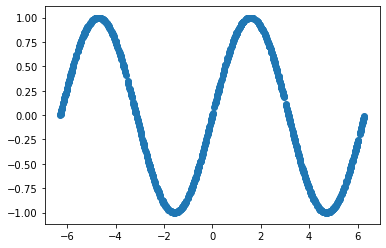

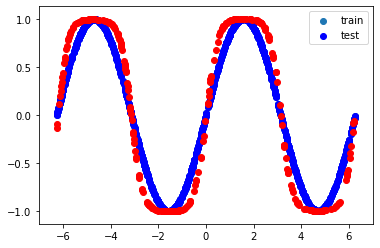

56.29010347378055


In [33]:
# pred_train = predictvals(train_x, parameters,activation='tanh')
plt.scatter(train_x[0],train_y[0])
plt.show()
plt.scatter(train_x[0],train_y[0])
plt.show

test_x=np.array(test).reshape(1,300)
pred_test = predictvals(test_x, parameters,activation='tanh')

plt.scatter(train_x[0],train_y[0],color='blue')
plt.scatter(test_x[0],pred_test[0],color='red')
plt.legend(['train','test'])
plt.show()

mape=predicterr(train_x,train_y,parameters,lambd=0.1,activation='tanh',regularisation='none',cost_func="mape")
print(mape)

In [ ]:
# plt.plot(train_x[0],train_y[0])